Anggota:
- Guido Tamara -1301193303
- Najla Nur Adila - 1301194001

# **Informasi Data**

#### Sumber Data

Data set yang digunakan yaitu Dataset Breast Cancer Wisconsin (Diagnostic),
https://drive.google.com/drive/folders/1Rtq5Xcp4TZwDczi3AtWJZn6fBlEjxHAZ?usp=sharing

Tujuan dari notebook ini adalah penerapan Machine Learning Automation Tools yang digunakan adalah TPOT untuk mengklasifikasikan apakah massa tumor tersebut jinak (malignant) atau ganas (benign) pada payudara wanita.

# **Import Library**

In [ ]:
%pip install TPOT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 17.8 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11953 sha256=ac6a695e246a8837824ac362c528a9f4d2f49d435bdff4cf018b84042d2ed107
  Stored in directory: /root/.cache/pip/wheels/a8/bb/8f/6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Split
from sklearn.model_selection import train_test_split

# Modeling
from tpot import TPOTClassifier


# Evaluation and comparision of all the models
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# **Load Data**

In [ ]:
#  Import the Data Train
df = pd.read_csv('https://raw.githubusercontent.com/Grendozramy/Tugas-Besar-PML/master/Dataset/train_clean.csv')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.000109,0.003716,0.545989,0.363733,0.680010,0.792037,0.702658,0.728615,0.668446,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.567974,0.909293,0.598462,0.418864
1,1,0.000138,0.044706,0.615783,0.501591,0.270471,0.181768,0.202315,0.342707,0.344367,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.191780,0.627960,0.233590,0.222878
2,1,0.000128,0.064008,0.595743,0.449417,0.572941,0.431017,0.461639,0.632301,0.481580,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.358800,0.829925,0.403706,0.213433
3,1,0.000036,0.059182,0.233501,0.102906,0.973233,0.811361,0.564899,0.518430,0.763481,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.547976,0.881302,1.000000,0.773711
4,1,0.000134,0.025681,0.630986,0.489290,0.459788,0.347893,0.463047,0.513915,0.342766,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.318485,0.544694,0.157500,0.142595


0    275
1    188
Name: diagnosis, dtype: int64


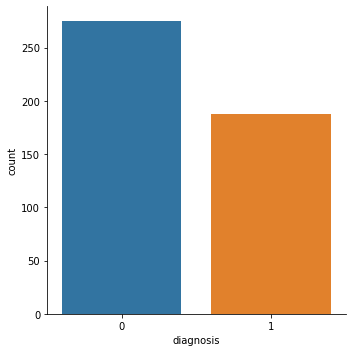

In [ ]:
# Mengecek keseimbangan target variable
print(df['diagnosis'].value_counts())
sns.catplot(x='diagnosis', data=df, kind='count')
plt.show()

# **Pemodelan**

### **Splitting Dataset**

In [ ]:
# Memisahkan antara feature dan target variable menjadi 2 objek, X dan y
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [ ]:
# Pemisahan train test split pada data, dengan ukuran test size 30% dan random_state 55.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

In [ ]:
# Membuat array kosong untuk menampung akurasi tiap model
list_accuracy = []

### **Melatih Model TPOT**

In [ ]:
tpot = TPOTClassifier(generations=3, population_size=20, cv=5, 
                            random_state=10, verbosity=2, n_jobs=-1)

tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/80 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9753846153846155

Generation 2 - Current best internal CV score: 0.9753846153846155

Generation 3 - Current best internal CV score: 0.9753846153846155

Best pipeline: SGDClassifier(input_matrix, alpha=0.001, eta0=0.01, fit_intercept=True, l1_ratio=0.5, learning_rate=constant, loss=hinge, penalty=elasticnet, power_t=50.0)


TPOTClassifier(generations=3, n_jobs=-1, population_size=20, random_state=10,
               verbosity=2)

In [ ]:
akurasi = tpot.score(X_test, y_test)
print("Accuracy is {}%".format(akurasi*100))
list_accuracy.append(akurasi)

Accuracy is 95.68345323741008%


# **Eksperimen Pemodelan**

In [ ]:
# Eksperimen 1
tpot1 = TPOTClassifier(generations=6, population_size=33, cv=5, 
                            random_state=10, verbosity=2, n_jobs=-1)
tpot1.fit(X_train, y_train)

akurasi_2 = tpot1.score(X_test, y_test)
print("Accuracy is {}%".format(akurasi_2*100))
list_accuracy.append(akurasi_2)

Optimization Progress:   0%|          | 0/231 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9753846153846155

Generation 2 - Current best internal CV score: 0.9814903846153846

Generation 3 - Current best internal CV score: 0.9814903846153846

Generation 4 - Current best internal CV score: 0.9814903846153846

Generation 5 - Current best internal CV score: 0.9814903846153846

Generation 6 - Current best internal CV score: 0.9814903846153846

Best pipeline: SGDClassifier(RBFSampler(input_matrix, gamma=0.55), alpha=0.001, eta0=0.01, fit_intercept=True, l1_ratio=0.75, learning_rate=invscaling, loss=squared_hinge, penalty=elasticnet, power_t=0.0)
Accuracy is 94.24460431654677%


In [ ]:
# Eksperimen 2
tpot2 = TPOTClassifier(generations=6, population_size=20, cv=4, 
                            random_state=10, verbosity=2, n_jobs=-1)
tpot2.fit(X_train, y_train)

akurasi_3 = tpot2.score(X_test, y_test)
print("Accuracy is {}%".format(tpot2.score(X_test, y_test)*100))
list_accuracy.append(akurasi_3)

Optimization Progress:   0%|          | 0/140 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9814814814814814

Generation 2 - Current best internal CV score: 0.9814814814814814

Generation 3 - Current best internal CV score: 0.9814814814814814

Generation 4 - Current best internal CV score: 0.9814814814814814

Generation 5 - Current best internal CV score: 0.9814814814814814

Generation 6 - Current best internal CV score: 0.9845679012345678

Best pipeline: LinearSVC(PCA(SelectFwe(input_matrix, alpha=0.019), iterated_power=8, svd_solver=randomized), C=15.0, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05)
Accuracy is 95.68345323741008%


In [ ]:
# Eksperimen 3
tpot3 = TPOTClassifier(generations=9, population_size=33, cv=5, 
                            random_state=10, verbosity=2, n_jobs=-1)
tpot3.fit(X_train, y_train)

akurasi_4 = tpot3.score(X_test, y_test)
print("Accuracy is {}%".format(akurasi_4*100))
list_accuracy.append(akurasi_4)

Optimization Progress:   0%|          | 0/330 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9753846153846155

Generation 2 - Current best internal CV score: 0.9814903846153846

Generation 3 - Current best internal CV score: 0.9814903846153846

Generation 4 - Current best internal CV score: 0.9814903846153846

Generation 5 - Current best internal CV score: 0.9814903846153846

Generation 6 - Current best internal CV score: 0.9814903846153846

Generation 7 - Current best internal CV score: 0.9814903846153846

Generation 8 - Current best internal CV score: 0.9815384615384616

Generation 9 - Current best internal CV score: 0.9815384615384616

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=9, max_features=0.3, min_samples_leaf=8, min_samples_split=5, n_estimators=100, subsample=0.6500000000000001)
Accuracy is 96.40287769784173%


In [ ]:
# Eksperimen 4
tpot4 = TPOTClassifier(generations=9, population_size=20, cv=5, 
                            random_state=10, verbosity=2, n_jobs=-1)
tpot4.fit(X_train, y_train)

akurasi_5 = tpot4.score(X_test, y_test)
print("Accuracy is {}%".format(akurasi_5*100))
list_accuracy.append(akurasi_5)


Optimization Progress:   0%|          | 0/200 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9753846153846155

Generation 2 - Current best internal CV score: 0.9753846153846155

Generation 3 - Current best internal CV score: 0.9753846153846155

Generation 4 - Current best internal CV score: 0.9753846153846155

Generation 5 - Current best internal CV score: 0.9753846153846155

Generation 6 - Current best internal CV score: 0.9753846153846155

Generation 7 - Current best internal CV score: 0.9753846153846155

Generation 8 - Current best internal CV score: 0.9784615384615385

Generation 9 - Current best internal CV score: 0.9784615384615385

Best pipeline: SGDClassifier(BernoulliNB(input_matrix, alpha=0.01, fit_prior=True), alpha=0.001, eta0=0.01, fit_intercept=True, l1_ratio=0.0, learning_rate=constant, loss=hinge, penalty=elasticnet, power_t=50.0)
Accuracy is 95.68345323741008%


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


# **Evaluasi Pemodelan**

In [ ]:
# Membuat list model dan akurasi
list_model = ['TPOT','TPOT-1', 'TPOT-2', 'TPOT-3', 'TPOT-4']
df_acc_validation = pd.DataFrame(list_model, columns = ['Model'])
df_acc_validation['Accuracy'] = list_accuracy

In [ ]:
# Menampilkan list model dan akurasi
df_acc_validation

,Model,Accuracy
0,TPOT,0.956835
1,TPOT-1,0.942446
2,TPOT-2,0.956835
3,TPOT-3,0.964029
4,TPOT-4,0.956835


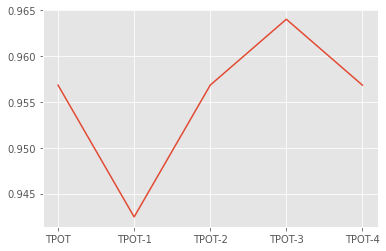

In [ ]:
# Line Plot pada akurasi tiap pemodelan
plt.style.use('ggplot')

x = df_acc_validation['Model']
y = df_acc_validation['Accuracy']

plt.plot(x, y)
plt.show()

In [ ]:
# predict tpot(terbaik) predict x_test memasukan ke variabel y_pred
y_pred = tpot3.predict(X_test)

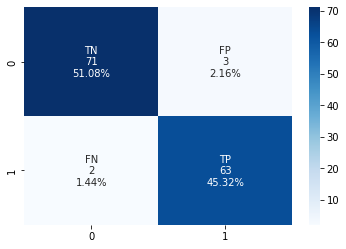

In [ ]:
# Visualisasi confusion matrix
cm = np.array(confusion_matrix(y_test, y_pred))

group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()

In [ ]:
# Menampilkan  classifier report yang berisi accuracy, f-1 score, dsb.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        74
           1       0.95      0.97      0.96        65

    accuracy                           0.96       139
   macro avg       0.96      0.96      0.96       139
weighted avg       0.96      0.96      0.96       139



In [ ]:
#  Import the Data Test
df_test = pd.read_csv('https://raw.githubusercontent.com/Grendozramy/Tugas-Besar-PML/master/Dataset/test_clean.csv')
df_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000038,0.047978,0.207933,0.114189,0.274608,0.120146,0.077394,0.079850,0.186332,0.181761,...,0.172181,0.319829,0.160715,0.076165,0.416232,0.148936,0.147306,0.262582,0.324266,0.154729
1,0.000055,0.047202,0.279801,0.167041,0.147828,0.124410,0.112408,0.134679,0.153230,0.116470,...,0.247954,0.316365,0.222571,0.123476,0.376610,0.164168,0.148586,0.339187,0.132072,0.093205
2,0.000056,0.057796,0.297699,0.169417,0.247354,0.315686,0.235405,0.132823,0.231714,0.302443,...,0.267165,0.359275,0.321679,0.134757,0.323120,0.521301,0.522939,0.449736,0.252316,0.458219
3,0.000055,0.061179,0.291549,0.166872,0.294926,0.274584,0.253006,0.166784,0.210892,0.215670,...,0.244397,0.358209,0.251457,0.123845,0.422175,0.317849,0.358800,0.387375,0.196728,0.175128
4,0.000016,0.046536,0.119342,0.060573,0.250639,0.107049,0.033086,0.019649,0.273892,0.298231,...,0.114550,0.335821,0.103093,0.047926,0.446609,0.095284,0.049790,0.057500,0.294106,0.155516


In [ ]:
# Mengubah data test ke vector
x_vector = df_test
y_predict = tpot3.predict(x_vector)   
y_prob = tpot3.predict_proba(x_vector)[:,1]

In [ ]:
# Load data test
test = pd.read_csv('https://raw.githubusercontent.com/Grendozramy/Tugas-Besar-PML/master/Dataset/test.csv')

In [ ]:
df_test['predict_prob']= y_prob
df_test['diagnosis_pred']= y_predict
df_test['id']= test['id']


cols_to_move = ['id','predict_prob', 'diagnosis_pred']
df_test = df_test[ cols_to_move + [ col for col in df_test.columns if col not in cols_to_move ] ]
df_test.sample(10)

,id,predict_prob,diagnosis_pred,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
99,925622,0.999873,1,0.000078,0.115980,0.411927,0.243224,0.514539,0.580701,0.596816,...,0.341160,0.820096,0.389910,0.179365,0.465760,0.741634,0.934408,0.803705,0.497536,0.563164
53,916799,0.999906,1,0.000112,0.060292,0.532168,0.385366,0.538873,0.323354,0.366593,...,0.495553,0.377932,0.457144,0.321422,0.515288,0.219567,0.299207,0.503947,0.297457,0.154729
92,924934,0.008043,0,0.000023,0.099284,0.151199,0.075461,0.338119,0.175449,0.139162,...,0.103522,0.610075,0.095423,0.042371,0.443968,0.139428,0.158504,0.292310,0.130298,0.182277
29,914062,0.999673,1,0.000109,0.060181,0.515583,0.366278,0.457355,0.335930,0.272954,...,0.483814,0.374200,0.463121,0.304955,0.394440,0.199290,0.202019,0.496506,0.332348,0.139118
72,919555,0.999918,1,0.000137,0.061845,0.649644,0.493955,0.512106,0.473959,0.487689,...,0.582355,0.358742,0.546790,0.399086,0.367364,0.277682,0.353120,0.730006,0.298048,0.135445
40,915143,0.999774,1,0.000166,0.056132,0.748462,0.652598,0.376080,0.331636,0.391704,...,0.813234,0.315832,0.802281,0.638223,0.321799,0.325222,0.302007,0.771107,0.264735,0.116293
71,919537,0.000384,0,0.000031,0.043874,0.186580,0.094210,0.418056,0.239679,0.121889,...,0.131270,0.386194,0.129588,0.054635,0.473024,0.217045,0.168343,0.318317,0.142716,0.181949
25,913512,0.000042,0,0.000039,0.035831,0.219059,0.117497,0.611875,0.224679,0.098797,...,0.191747,0.255064,0.180089,0.089609,0.537740,0.116822,0.117709,0.316687,0.244234,0.165289
19,912519,0.001956,0,0.000059,0.024128,0.300809,0.170859,0.542523,0.294829,0.134163,...,0.245464,0.167910,0.221774,0.116742,0.449911,0.215977,0.146346,0.441941,0.327617,0.250689
79,921644,0.095297,0,0.000073,0.087137,0.351807,0.222736,0.246259,0.161831,0.094713,...,0.305229,0.540245,0.283829,0.157589,0.230007,0.107023,0.127388,0.356903,0.228070,0.095238


In [34]:
df_test.to_csv('../Dataset/submission.csv')

# **Kesimpulan**

Pada tugas besar  ini yang telah kami lakukan, berfokus pada kinerja dari pemodelan penerapan Machine Learning Automation Tools yang digunakan adalah TPOT untuk mengklasifikasikan apakah massa tumor tersebut jinak (malignant) atau ganas (benign) pada payudara wanita terhadap dataset Breast Cancer Wisconsin (Diagnostic). sehingga dapat ditarik beberapa kesimpulan, yaitu sebagai berikut:
- Dataset sekitar 463 sampel (data train) + split, 106 sampel(data test) & preprocessing.
- Bengin(B) yang terdeteksi lebih banyak dari Malignant(M).  
- Pemodelan terbaik yaitu model TPOT (generations=9, population_size=33, cv=5,  random_state=10, verbosity=2, n_jobs=-1) `(GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=9, max_features=0.3, min_samples_leaf=8, min_samples_split=5, n_estimators=100, subsample=0.6500000000000001)` memilki Classification Report tingkat akurasi paling tertinggi.